# Определение закономерностей успешности игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Описание рейтингов от организации ESRB

- **EC** («Early childhood») — Для детей младшего возраста
- **E** («Everyone») — Для всех. Первоначально **K-A** ("Kids to Adults")
- **E10+** («Everyone 10 and older») — Для всех от 10 лет и старше
- **T** («Teen») — Подросткам
- **M** («Mature») — Для взрослых
- **AO** («Adults Only 18+») — Только для взрослых
- **RP** («Rating Pending») — Рейтинг ожидается

### Оглавление

1. [Открытие и изучение данных](#step1)
2. [Предобработка данных](#step2)
3. [Анализ данных](#step3)
4. [Составление портрета пользователя](#step4)
5. [Проверка гипотез](#step5)
6. [Общий вывод](#step6)

<a id="step1"></a>
## 1. Открытие и изучение данных

На данном шаге прочитаем данные из файла и ознакомимся с ними.

In [1]:
# подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats as st
from IPython.display import display

In [2]:
# прочитаем данные из файла и выведе первые 10 строк
games = pd.read_csv('games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# выведем названия столбцов таблицы
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
# выведем общую информацию по таблице
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

На данном шаге было произведено чтение данных из файла, сохранение их в таблицу, а также первичное ознакомление с данными.<br>
В таблице 16715 строк ии 11 столбцов.<br>
Данные в файле лежали верно (с ожидаемым разделителем - запятой), и считались в таблицу правильно. Названия колонок все на латинском языке, пробелов между словами, а также лишних пробелов в начале и в конце не содержат. Однако названия не в одном регистре - на этапе предобработки данных необходимо исправить это. Как видно из информации о таблице в некоторых столбцах есть пропуски. Также можно заметить, что не для всех колонок верно определены типы данных.

<a id="step2"></a>
## 2. Предобработка данных

На данном шаге подготовим данные для дальнейшего анализа.

Для начала переименуем столбцы, чтобы все названия были в одном регистре (нижнем).

In [5]:
new_column_names = map(str.lower, games.columns)
games.set_axis(new_column_names, axis='columns', inplace=True)

In [6]:
# проверим изменение
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Перед приведением данных к правильным типам данных, обработаем пропуски. Т.к. может возникнуть ситуация, что мы захотим преобразовать столбец к целочисленному типу данных, но встретим NA, и преобразование не получится.

Посмотрим, в каких столбцах у нас есть пропуски.

In [7]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски содержатся в столбцах: `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`. Рссмотрим их поподробнее.

In [8]:
games.loc[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видно из полученного запроса, в 2-х строках нет имени, а вместе с ним и жанра и оценок. Такие данные не помогут нам в дальнейшем - удалим их из датасета. Поскольку пропуски присутствуют сразу в нескольких колонках (`name`, `genre`), а таких пропусков всего 2, то можно предположить, что эти строки относятся к одной и той же игре. В подтверждение этого факта служит и одинаковый год выпуска (1993), и тот факт что в одной строке нет данных по продажам в Японии, а в другой только он и есть. Скорее всего произошла ошибка при внесении данных в таблицу, и данные вносились частями, поэтому создались "уточняющие копии".

In [9]:
games.dropna(subset=['name'], inplace=True)
games = games.reset_index(drop=True)

In [10]:
# выведем строки с нулевым годом выпуска
games.loc[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Для этих данных нельзя заполнить столбец каким-либо логическим значением. Для некоторых игр в названиях есть "год", но как мы знаем, что год в названии не означет, что игра вышла в этом году. Таким образом, чтобы не портить статистику догадками заполним данный столбец нулями. Это будет означать, что для данной игры год выпуска не определен. В дальнейшем будем это учитывать.  
Такие пропуски скорее всего возникли, из-за необязательности данных при вводе. Название, жанр, продажи и оценки - первоочередные показатели, обычно на год выпуска смотрят уже после.

In [11]:
games['year_of_release'] = games['year_of_release'].fillna(0)

Что касается столбцов с оценками, если там нет значений, то скорее всего нет и оценок. Заполним данные столбцы нулями. Также в оценках есть значения tbd (to be determined). Это означет, что необходимо решить какой рейтинг поставить. Эти значения скорее всего подсказка для тех, кто собирает данные, но они не указаны. Поэтому тоже примем их за 0.

In [12]:
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)

games['critic_score'] = games['critic_score'].where(~games['critic_score'].isin(['tbd']), 0)
games['user_score'] = games['user_score'].where(~games['user_score'].isin(['tbd']), 0)

print('unique critic_score:', games['critic_score'].unique())
print()
print('unique user_score: ', games['user_score'].unique())

unique critic_score: [76.  0. 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

unique user_score:  ['8' 0 '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Для рейтинга от организации ESRB установлены ограничения на используемые категории. Поскольку у нас есть незаполненные значения, а в перечне категорий есть RP («Rating Pending») — Рейтинг ожидается, то заменим наши пропущенные значения этой категорией. Смысл остается прежним, рейтинг пока не был установлен по ряду причин, но он ожидается.

In [13]:
games['rating'] = games['rating'].fillna('RP')

games['rating'].value_counts()

RP      6767
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

Мы заполнили все пропуска во всех столбцах. Проверим результат.

In [14]:
print(games.isnull().sum())
print()
games.info()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+

После преобразуем данные к правильным типам данных.

Столбцы `name`, `platform`, `genre`, `rating` хранят в себе строки - типы данных верные.  
Столбцы `na_sales`, `eu_sales`, `jp_sales`, `other_sales` хранят в себе значения в миллионах копий. Не все продажи кратны миллионам, в данных значениях отражаются и тысячи. Таким образом здесь типы данных также верные.  
Столбец `year_of_release` (год выпуска) должен быть целочисленным, т.к. здесь хранится год. Необходимо изменить.  
Столбец `critic_score` хранит оценку критиков. Обычно по стобальной системе, дробных оценок нет, так что переведем в целочисленный тип данных.  
Столбец `user_score` также хранит оценку, но уже по 10 бальной шкале, и здесь могут быть нецелые оценки. Приведем данные к типу float.  

In [15]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['critic_score'] = games['critic_score'].astype(int)
games['user_score'] = pd.to_numeric(games['user_score']) 

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.3+ MB


Добавим в таблицу столбец с сумарными продажами по всем регионам.

In [17]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [18]:
# проверим, что ожидаемый столбец появился в таблице
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,RP,31.38


### Вывод

На данном шаге производилась подготовка данных для дальнейшего анализа. В процессе были переименованы столбцы (приведены все к одному формату), заполнены пропущенные значения, отредактированы типы данных в столбцах. Также была посчитана дополнительная информация по продажам, которая будет полезна в дальнейшем.

<a id="step3"></a>
## 3. Анализ данных

### 3.1 Количество игр в разные годы

Посмотрим сколько игр выпускалось в разные годы.

In [19]:
games.groupby('year_of_release')['name'].count()

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Мы вывели список количества игр по годам. На предыдущем шаге мы условились, что для строк в которых нет года выпуска, мы проставим нули. Так что данные с годом выпуска 0, при анализе с этим показателем для нас не важны.

In [20]:
games_filtered = games.query('year_of_release != 0')
games_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB


### 3.2 Продажи по платформам

Посмотрим, как менялись продажи по платформам. Для этого возьмем платформы с наибольшими суммарными продажами.

In [21]:
sorted_platforms = games_filtered.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False)
sorted_platforms.head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

Как видно из полученной таблицы резкий спад в продажах происходит на консоли PS4. Таким образом, возьмем для рассмотрения первые 6 платформ (соответственно до PS4)

In [22]:
top_sales_platforms = sorted_platforms.index[0:6].tolist()
top_sales_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Возьмем только игры с интересующими нас платформами. Затем сгруппируем по году выпуска, платформе, и посчитаем суммарные продажи.

In [23]:
games_top_platforms = games_filtered.query('platform in @top_sales_platforms')
games_top_platforms_grouped = \
        games_top_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

Построим распределения по годам для каждой платформы.

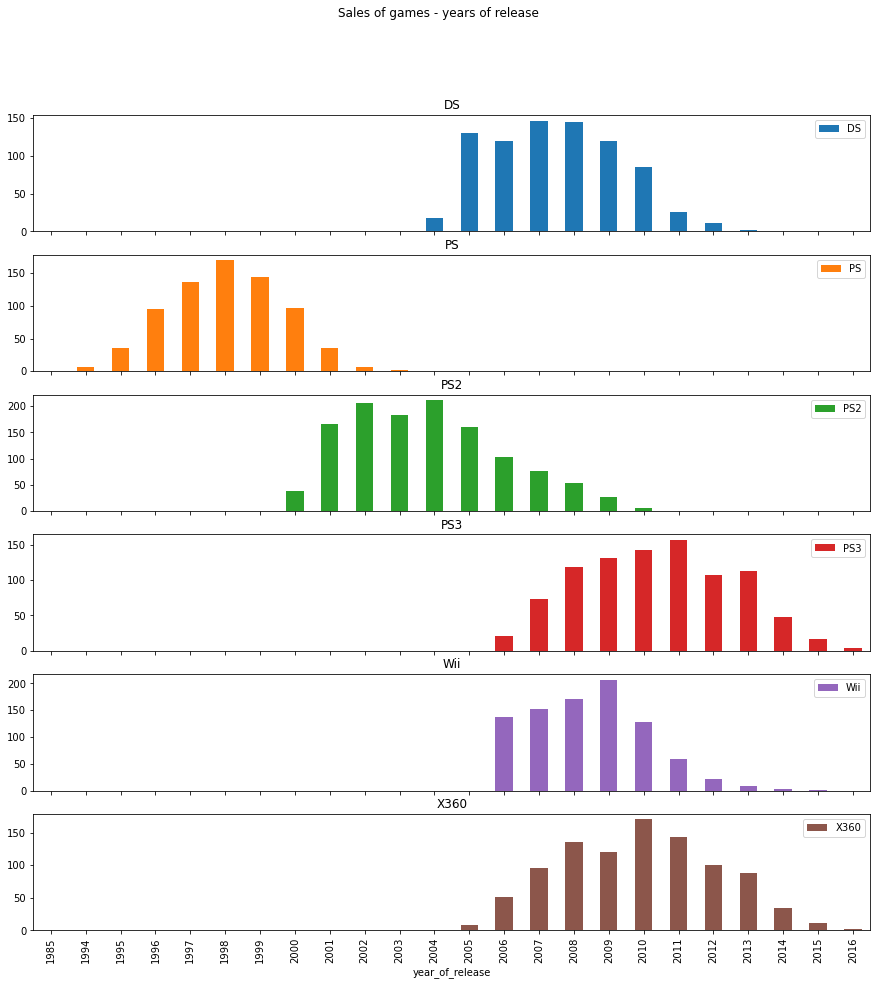

In [24]:
games_top_platforms_grouped.plot(kind='bar', subplots=True, figsize=(15, 15), title='Sales of games - years of release');

По построенным графикам видно, что разные платформы то становятся более популярными, соответственно продажи растут, то, наоборот, теряют свои позиции - денег за продажи меньше. На основе наблюдения, можно понять, что характерный срок популярности для какой-либо платформы составляет 10 лет.

### 3.3 Выбор актуального периода

Характерный "срок жизни" платформы, как мы определили составляет 10 лет. За это время платформа набирает популярность, проходит свой пик и, далее, теряет актуальность. Наша цель - построить прогноз на следующий год (2017). В качестве актуального периода возьмем срок в 5 лет. За это время, мы сможем "захватить" платформы которые появились 5 лет назад, и выходят на пик как раз на следующий год. Также мы учтем консоли котрые были популярны 5 лет назад, но сейчас теряют свою актуальность.

In [25]:
relevant_years = [2012, 2013, 2014, 2015, 2016]

### 3.4 Выборка данных за актуальный период

Для дальнейшего анализа выберем только данные, входящие в актуальный период.

In [26]:
games_relevant = games_filtered.query('year_of_release in @relevant_years')

In [27]:
games_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int32  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     2886 non-null   int32  
 9   user_score       2886 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(6), int32(2), object(4)
memory usage: 270.6+ KB


### 3.5 Анализ платформ за актуальный период

Рассмотрим платформы, которые актуальны за выбранный период. Построим графики, используем такой же принцип, как и для предыдущего исследования для топ продаж.

In [28]:
# узнаем какие платформы популярны за выбранный период
games_relevant['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

Узнаем, кто лидирует по продажам за данный период.

In [29]:
games_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
Name: total_sales, dtype: float64

Сгруппируем данные для графиков

In [30]:
games_relevant_stat = \
        games_relevant.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

Построим распределения для каждой платформы

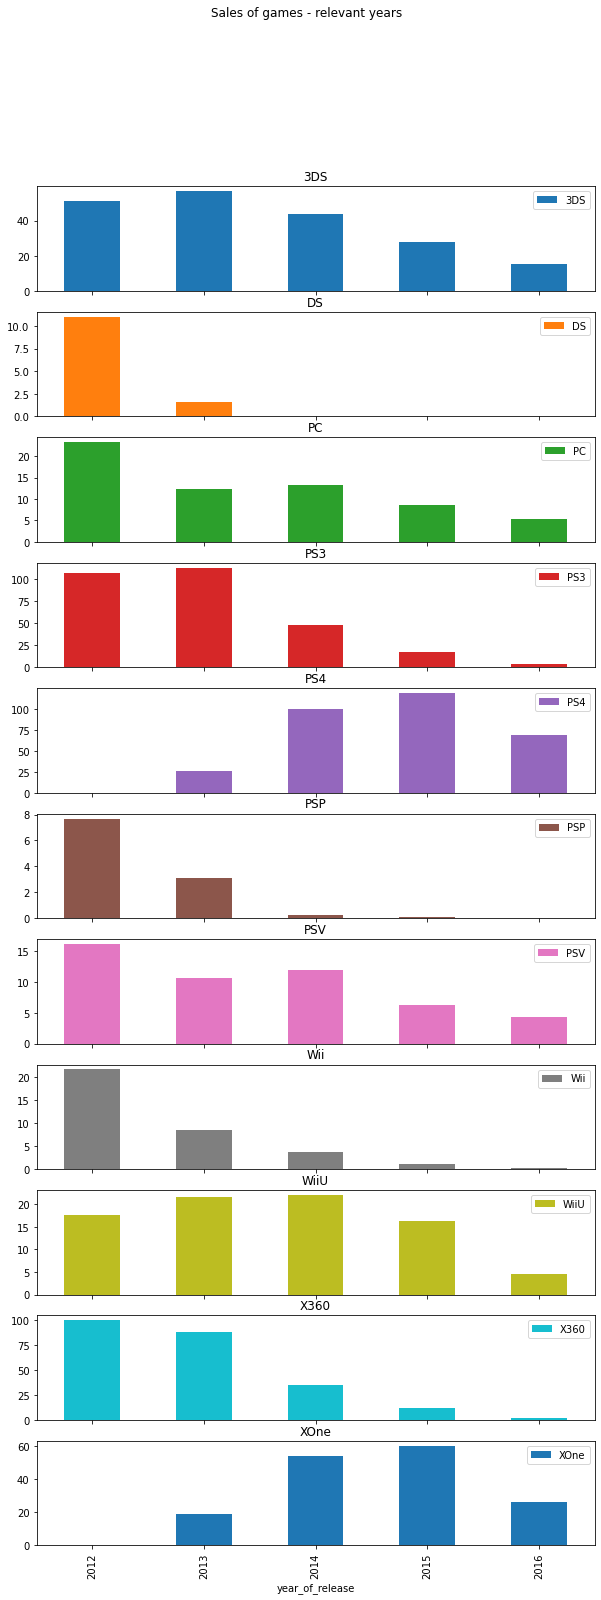

In [31]:
games_relevant_stat.plot(kind='bar', subplots=True, figsize=(10, 25), title='Sales of games - relevant years');

Судя по графикам такие платформы, как PS4 и XOne укрепляют свои позиции, продажи растут. Остальные же платформы в разной степени уже не такие перспективные в будущем году.

### 3.6 «Ящик с усами» по глобальным продажам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

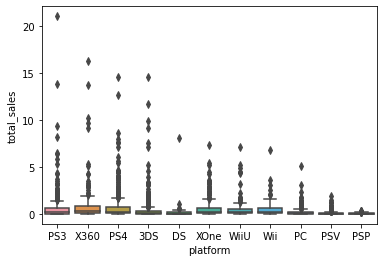

In [32]:
ax = sns.boxplot(x='platform', y='total_sales', data=games_relevant)

Чтобы график был более наглядным, отформатируем способ вывода.

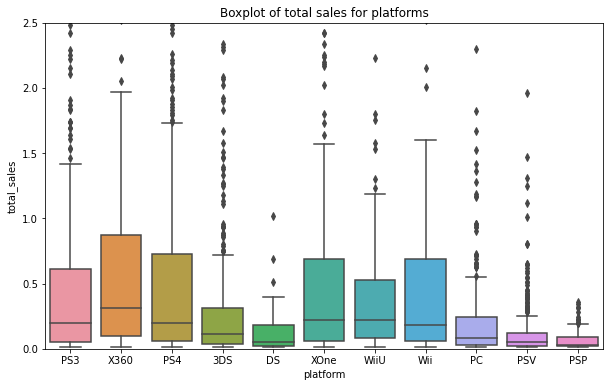

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x='platform', y='total_sales', data=games_relevant)
ax.set_ylim(0, 2.5)
ax.set_title('Boxplot of total sales for platforms');

На графиках показаны суммарные продажи различных игр для разных платформ. Наиболее успешная платформа - X360. Для нее медианное значение продаж одной игры выше всех. Также для данной платформы самые длинные "усы", это означает, что продажи до 2 млн вполне нормальное явление. За предыдущее 5 лет выгоднее всего было производить игры для этой платформы. В целом стоит отметить для популярных (`PS3`, `PS4`, `X360`, `XOne`, `Wii`, `WiiU`) платформ медианное значение продаж примерно находится на одном уровне. Самая продаваемая игра была выпущена на `PS3`. Для остальных платформ стоит отметить, что довольно много выбросов для платформы `3DS`. Это означает, что, в общем, игры продаются довольно средне, но похоже что есть много экслюзивов, которые пользуются большой популярностью.

### 3.7 Влияние пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качетсве платформы возьмем `X360`. Также стоит учесть, что мы заполняли пропуски в оценках нулями, и такие данные не стоит учитывать при изучении влияния на продажи.

In [34]:
games_x360 = games_relevant.query('platform == "X360" & critic_score != 0 & user_score != 0')
games_x360_stat = games_x360[['critic_score', 'user_score', 'total_sales']]

Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

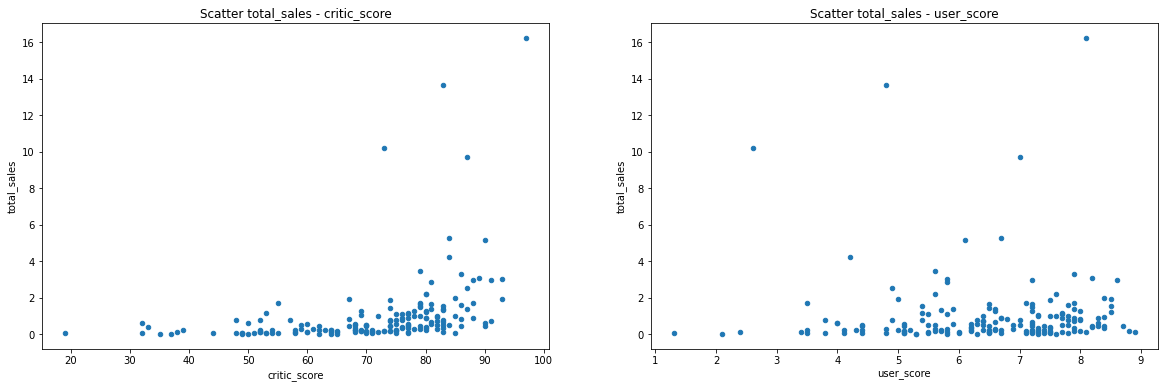

Correlation (total_sales - critic_score) = 0.36057348885073365
Correlation (total_sales - user_score) = -0.0020140394826897853


In [35]:
def check_scatter_sales_scores(check_table):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    check_table.plot(x='critic_score', y='total_sales', kind='scatter', 
                         ax=ax1, title='Scatter total_sales - critic_score');
    check_table.plot(x='user_score', y='total_sales', kind='scatter', 
                        ax=ax2, title='Scatter total_sales - user_score');
    plt.show()

    print("Correlation (total_sales - critic_score) =", check_table['total_sales'].corr(check_table['critic_score']))
    print("Correlation (total_sales - user_score) =", check_table['total_sales'].corr(check_table['user_score']))
    
    
check_scatter_sales_scores(games_x360_stat)

Как видно из графиков и посчитанных значений корелляции, суммарные продажи хоть слабо, но все же зависят от оценок критиков. На левом графике видно, что с увеличением оценок, увеличивается и разброс продаж. Оценки же пользователей, можно сказать, совсем не влияют на продажи, корреляция очень близка к нулю, а разброс на графике присутствует для всех оценок.

### 3.8 Продажи игр на других платформах

Теперь посмотрим, как обстоят дела на других платформах. Получим список платформ и применим ранее написанную функцию.

In [36]:
platform_list = games_relevant['platform'].unique().tolist()
platform_list.remove('X360')
platform_list

['PS3', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'PSP']

--------------------------------------------------
Platform:  PS3


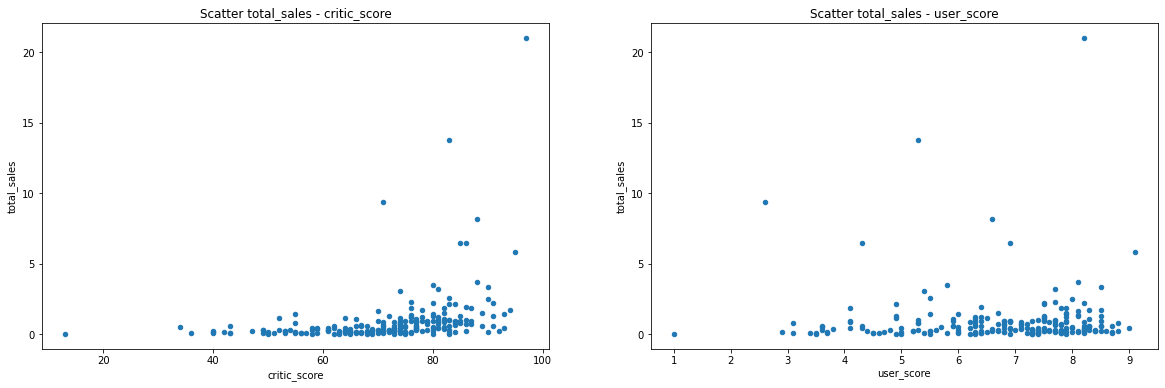

Correlation (total_sales - critic_score) = 0.3310566175801407
Correlation (total_sales - user_score) = 0.0032274054930356904
--------------------------------------------------
Platform:  PS4


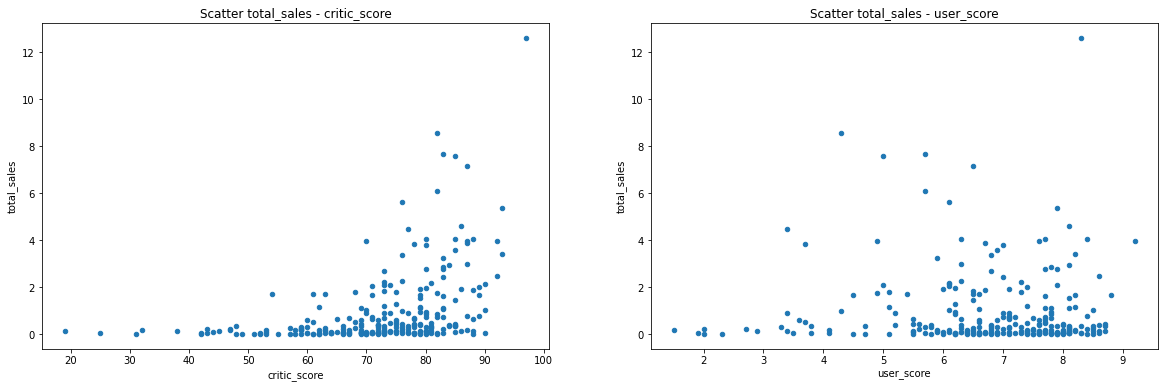

Correlation (total_sales - critic_score) = 0.40589480145836687
Correlation (total_sales - user_score) = -0.03362497596528878
--------------------------------------------------
Platform:  3DS


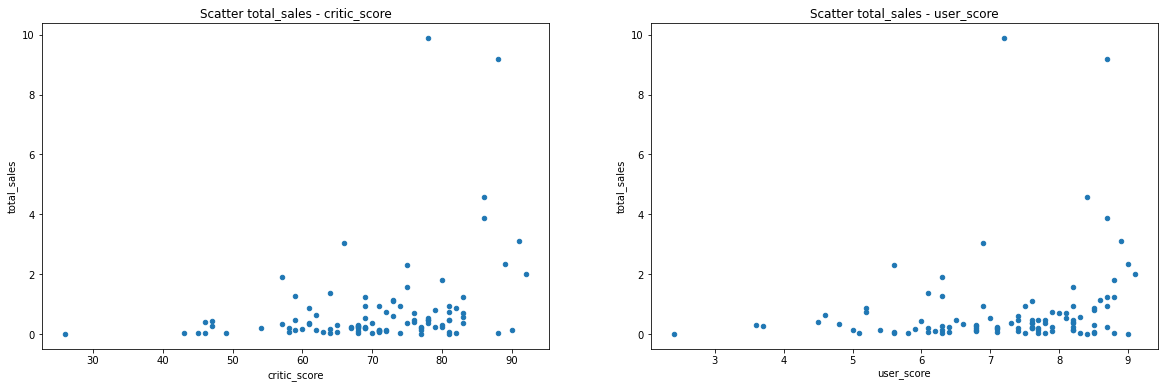

Correlation (total_sales - critic_score) = 0.31055301915326294
Correlation (total_sales - user_score) = 0.2018125500765528
--------------------------------------------------
Platform:  DS


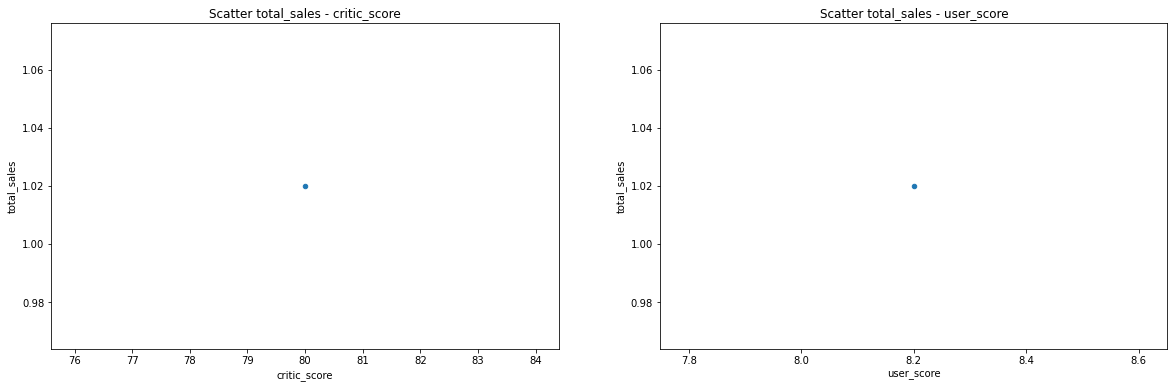

C:\Users\ruslan\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ruslan\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Correlation (total_sales - critic_score) = nan
Correlation (total_sales - user_score) = nan
--------------------------------------------------
Platform:  XOne


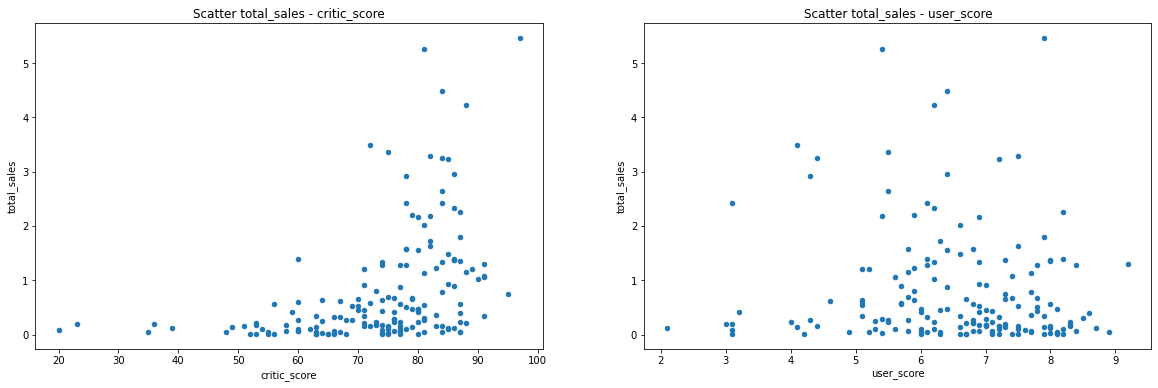

Correlation (total_sales - critic_score) = 0.4104220356129637
Correlation (total_sales - user_score) = -0.09400318326920852
--------------------------------------------------
Platform:  WiiU


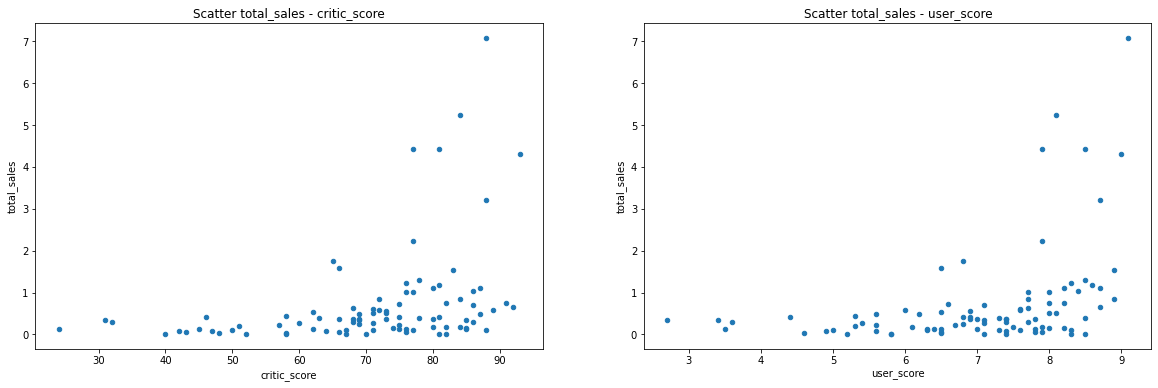

Correlation (total_sales - critic_score) = 0.35088242248864304
Correlation (total_sales - user_score) = 0.3918479505297129
--------------------------------------------------
Platform:  Wii


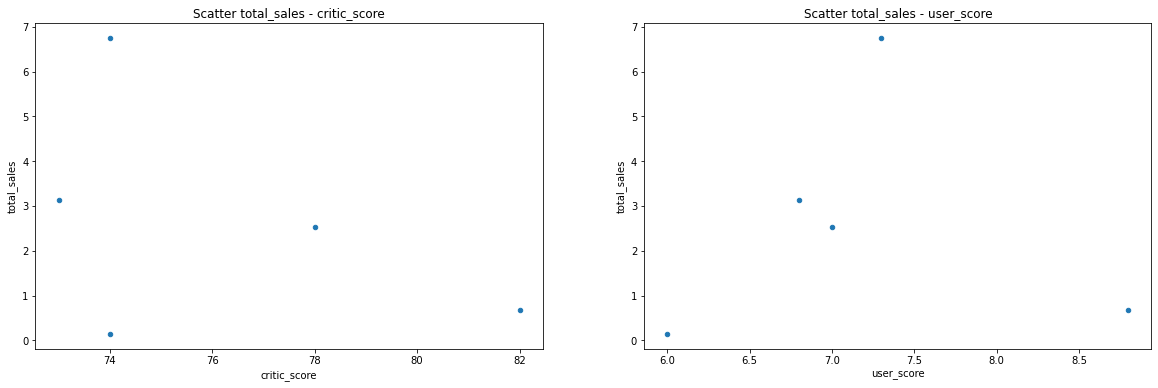

Correlation (total_sales - critic_score) = -0.4243413011077495
Correlation (total_sales - user_score) = 0.009755531330354733
--------------------------------------------------
Platform:  PC


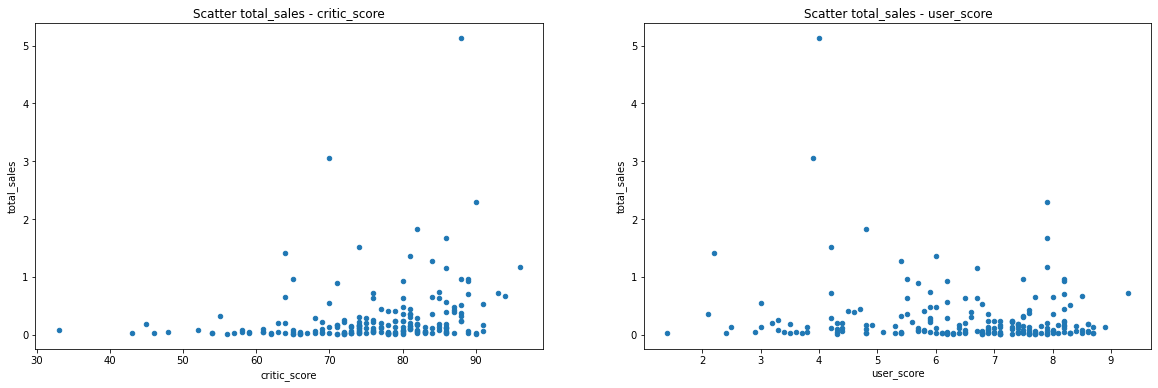

Correlation (total_sales - critic_score) = 0.2360077361879236
Correlation (total_sales - user_score) = -0.1369335107338787
--------------------------------------------------
Platform:  PSV


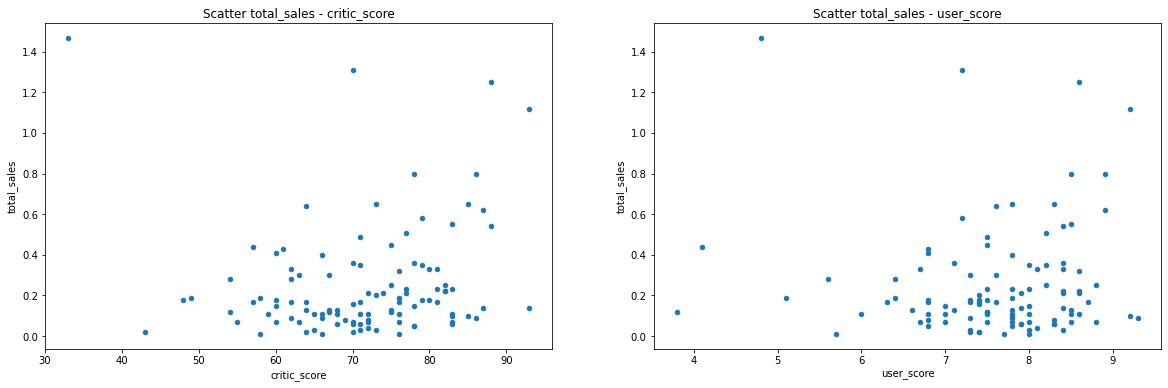

Correlation (total_sales - critic_score) = 0.0939880410094661
Correlation (total_sales - user_score) = 0.013902409906331152
--------------------------------------------------
Platform:  PSP


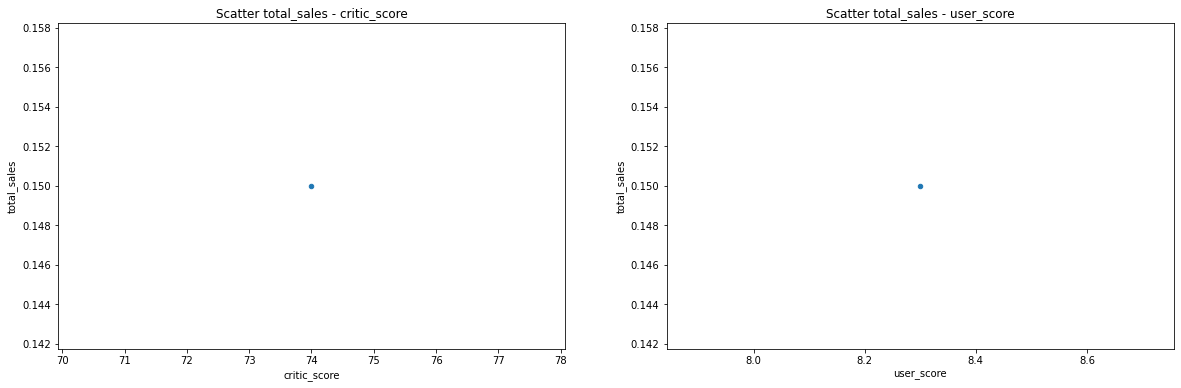

Correlation (total_sales - critic_score) = nan
Correlation (total_sales - user_score) = nan


In [37]:
for cur_platform in platform_list:
    print('--------------------------------------------------')
    print('Platform: ', cur_platform)
    check_scatter_sales_scores(games_relevant.query('platform == @cur_platform  & critic_score != 0 & user_score != 0'))

In [38]:
# пример, где данных недостаточно
games_relevant.query('platform == "DS" & critic_score != 0 & user_score != 0').head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2038,Pokemon Conquest,DS,2012,Role-Playing,0.56,0.05,0.37,0.04,80,8.2,E,1.02


Не для всех платформ, оказалось достаточно данных для формирования полноценного вывода. Но в целом, тенденции прослеживаются и для других платформ. Оценки критиков, в среднем, влияют несколько больше, чем оценки пользователей.

### 3.9 Распределение по жанрам

Посмотрим на общее распределение игр по жанрам.

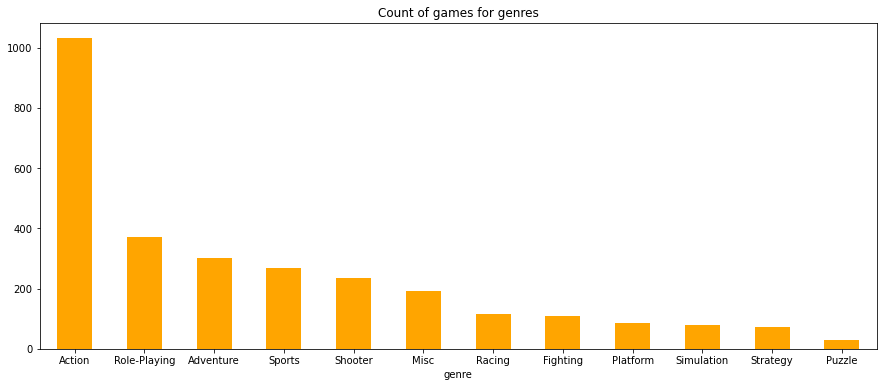

In [39]:
(games_relevant
    .groupby(by='genre')['name']
    .count()
    .sort_values(ascending=False)
    .plot(rot=0, kind='bar', color='orange', title='Count of games for genres', figsize=(15, 6))
);

Из графика видно, что больше всего игр в жанре "Action". Менее всего людей интересует жанр "Puzzle".

Рассмотрим распределение прибыли по жанрам.

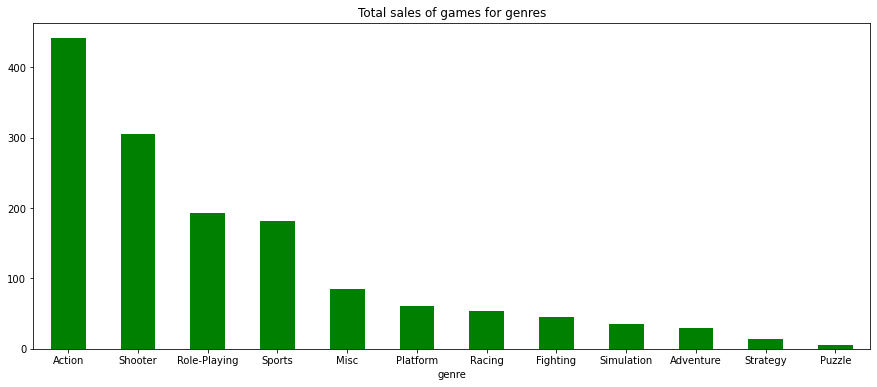

In [40]:
(games_relevant
    .groupby(by='genre')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .plot(rot=0, kind='bar', color='Green', title='Total sales of games for genres', figsize=(15, 6))
);

Самым прибыльным жанром является также `Action`. Также к жанрам с высокой прибылью можно отнести `Shooter`, `Role-Playing`, `Sports`. Низкие продажи наблюдаются для жанров `Strategy` и `Puzzle`. Отдельно стоит сказать про жанр "Adventure". Он занимает третье место по количеству выпущенных игр (более 300), но его продажи вместе с этим очень низкие для такого количества. Можно предположить, что это довольно популярный жанр, для которого не так много качественных предложений. Пусть лучше будет меньше игр в этом жанре, но они будут выполнены на высоком уровне

### Вывод

На данном шаге проводился анализ данных. Было изучено распределение выпуска игр по годам, а также их продажи. На основе этого был определен характерный срок "жизни" платформы. Данные были проанлизирваны и выбран актуальный период, который будет использован для прогнозирования продаж на следующий год. Изучены различные платформы, которые будут востребованы в ближайшее время, и игры для которых приносят больше всего продаж. Проанализированы зависимсти суммарных продаж по миру от оценок критиков и пользователей, а также жанра игры.

<a id="step4"></a>
## 4. Составление портрета пользователя

### 4.1 Cамые популярные платформы для пользователя каждого региона (NA, EU, JP)

In [41]:
# Посчитаем для каждой платформы суммарные продажи по каждому региону
region_top_platforms_stat = games_relevant.groupby(by='platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
region_top_platforms_stat

,na_sales,eu_sales,jp_sales
platform,,,
3DS,55.31,42.64,87.79
DS,4.59,3.53,3.72
PC,19.12,37.76,0.00
PS3,103.38,106.86,35.29
PS4,108.74,141.09,15.96
PSP,0.13,0.42,10.47
PSV,10.98,11.36,21.04
Wii,17.45,11.92,3.39
WiiU,38.10,25.13,13.01


Для каждого региона расчитаем общее количество продаж, отсортируем платформы по убыванию продаж, вычислим доли продаж от общего количества и выведем топ-5 платформ.

In [42]:
# функция для определения топ-5 значений параметра по суммарным продажам по регионам
def find_top_params(reg_top_params):
    total_reg_sales = reg_top_params.sum()
    reg_top_params_sorted = reg_top_params.sort_values(ascending=False)
    reg_top_params_sorted /= total_reg_sales
    reg_top_params_sorted = reg_top_params_sorted[0:5]
    display(reg_top_params_sorted)
    print('top-5 part =', reg_top_params_sorted.sum())

In [43]:
for cur_region in region_top_platforms_stat.columns:
    print('------------------------------------------')
    print('Region: ', cur_region[0:2])
    find_top_params(region_top_platforms_stat[cur_region])

------------------------------------------
Region:  na


platform
X360    0.236983
PS4     0.184003
PS3     0.174933
XOne    0.157571
3DS     0.093592
Name: na_sales, dtype: float64

top-5 part = 0.8470819161717178
------------------------------------------
Region:  eu


platform
PS4     0.278383
PS3     0.210844
X360    0.147034
XOne    0.101792
3DS     0.084132
Name: eu_sales, dtype: float64

top-5 part = 0.8221853912631705
------------------------------------------
Region:  jp


platform
3DS     0.455862
PS3     0.183249
PSV     0.109253
PS4     0.082875
WiiU    0.067556
Name: jp_sales, dtype: float64

top-5 part = 0.8987953058469211


В Северной Америке самой популярной платформой является `X360` - на ее долю приходится 24% всех продаж. Это не удивительно, ведь компания производящая данную платформу базируется в Америке, и стоило ожидать от этой консоли лидирующую позицию. Замыкает пятерку платформа `3DS` из Японии. В общем, на топ 5 платформ приходится 85% продаж.<br>
В Европе ситуация аналогичная, те же самые платформы (правда распределены несколько другим образом), очень близкий (82%) процент продаж.<br>
В Японии в топ-5 уже нет платформ от американской компании и представлены только местные фирмы. Стоит отметить что 46%, практически половина от всех продаж, занимает `3DS`. Если рассмотривать данные по отдельным регионам, то она и вовсе первая по доле от общего объема продаж. Топ-5 платформ представляют 90% рынка.

### 4.2 Cамые популярные жанры для пользователя каждого региона (NA, EU, JP)

In [44]:
# Посчитаем для каждого жанра суммарные продажи по каждому региону
region_top_genre_stat = games_relevant.groupby(by='genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
region_top_genre_stat

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Adventure,8.92,9.46,8.24
Fighting,19.79,10.79,9.44
Misc,38.19,26.32,12.86
Platform,25.38,21.41,8.63
Puzzle,1.13,1.40,2.14
Racing,17.22,27.29,2.50
Role-Playing,64.00,48.53,65.44
Shooter,144.77,113.47,9.23


In [45]:
for cur_region in region_top_genre_stat.columns:
    print('------------------------------------------')
    print('Region: ', cur_region[0:2])
    find_top_params(region_top_genre_stat[cur_region])

------------------------------------------
Region:  na


genre
Action          0.300929
Shooter         0.244970
Sports          0.137960
Role-Playing    0.108297
Misc            0.064623
Name: na_sales, dtype: float64

top-5 part = 0.8567778398226645
------------------------------------------
Region:  eu


genre
Action          0.314392
Shooter         0.223886
Sports          0.136321
Role-Playing    0.095754
Racing          0.053846
Name: eu_sales, dtype: float64

top-5 part = 0.824197940097076
------------------------------------------
Region:  jp


genre
Role-Playing    0.339807
Action          0.274172
Misc            0.066777
Simulation      0.054055
Fighting        0.049019
Name: jp_sales, dtype: float64

top-5 part = 0.7838300965832385


Распределение жанров для Северной Америки и Европы похожи. И там, и там превалирует жанр `Action` (примерно 30%). Что касается Японии: во-первых, самым популярным жанром являстя уже `Role-Playing` (34%), во-вторых, в целом, в этой стране люди больше склонны к разнообразию в выборе жанра. Второй аргумент объясняется тем, что на топ-5 жанров приходится 78% продаж (то есть 22% на остальные жанры) против 86% в Северной Америке (14% на другие жанры) и 82% в Европе (18% на другие жанры).

### 4.3 Влияние рейтинга ESRB на продажи в отдельном регионе

In [46]:
# Посчитаем для каждого рейтинга суммарные продажи по каждому региону
region_top_rating_stat = games_relevant.groupby(by='rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
region_top_rating_stat

,na_sales,eu_sales,jp_sales
rating,,,
E,114.37,113.03,28.33
E10+,75.70,55.37,8.19
M,231.57,193.96,21.20
RP,103.31,91.50,108.84
T,66.02,52.96,26.02


In [47]:
for cur_region in region_top_rating_stat.columns:
    print('------------------------------------------')
    print('Region: ', cur_region[0:2])
    find_top_params(region_top_rating_stat[cur_region])

------------------------------------------
Region:  na


rating
M       0.391847
E       0.193529
RP      0.174814
E10+    0.128094
T       0.111715
Name: na_sales, dtype: float64

top-5 part = 0.9999999999999999
------------------------------------------
Region:  eu


rating
M       0.382700
E       0.223018
RP      0.180537
E10+    0.109250
T       0.104495
Name: eu_sales, dtype: float64

top-5 part = 1.0
------------------------------------------
Region:  jp


rating
RP      0.565168
E       0.147108
T       0.135113
M       0.110084
E10+    0.042528
Name: jp_sales, dtype: float64

top-5 part = 1.0000000000000002


Из приведенных распределений можно сделать вывод, рейтинг несомненно влияет на продажи в Северной Америке и Европе. Рейтинг M (17+), то есть игры для взрослых, определяет чуть менее 40% продаж. Это объясняется тем, что современные игры переросли из развлечения для детей в разряд развлечения для людей всех возрастов. Взрослые люди хотят соответствующий контент, чтобы тратить негативную энергию, и они такой контент получают.<br>
В Японии рейтинг наоборот, не влияет на продажи. Этому может быть причина, что система рейтингов ESRB направлена на регулирование контента в первую очередь в США и Канаде. Поэтому многие игры в Японии либо не имеют этого рейтинга (на предыдущих шагах пропуски были заменены на рейтинг RP (Rating Pending), либо имели соответственно это же самый по умолчанию).

### Вывод

На данном шаге был соствлен пользователя каждого региона. Были определены топ-5 самых популярных платформ, топ-5 самых популярных жанров и выявлено влияние рейтинга ESRB на продажи в отдельном регионе. Для Северной Америки и Европы картины похожи, примерно одни и те же платформы, популярные жанры и рейтинги. На это влияет как исторический контекст, так и схожий менталитет людей. Япония в этом плане отличается, у нее свои консоли, свои популярные жанры и своя система оценки рейтинга.

<a id="step5"></a>
## 5. Проверка гипотез

Проверим гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Нулевая гипотеза: "Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC".  
H0: X_xbox_one = X_pc (X - среднее значение)  
Альтернативная гипотеза: "Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC".  
H1: X_xbox_one != X_pc (X - среднее значение)

variance of user_score for Xbox One games = 1.9069968429360702
variance of user_score for PC games = 2.7704439971584156
--------------------------------------------------------------
mean of user_score for Xbox One games = 6.52142857142857
mean of user_score for PC games = 6.428640776699027


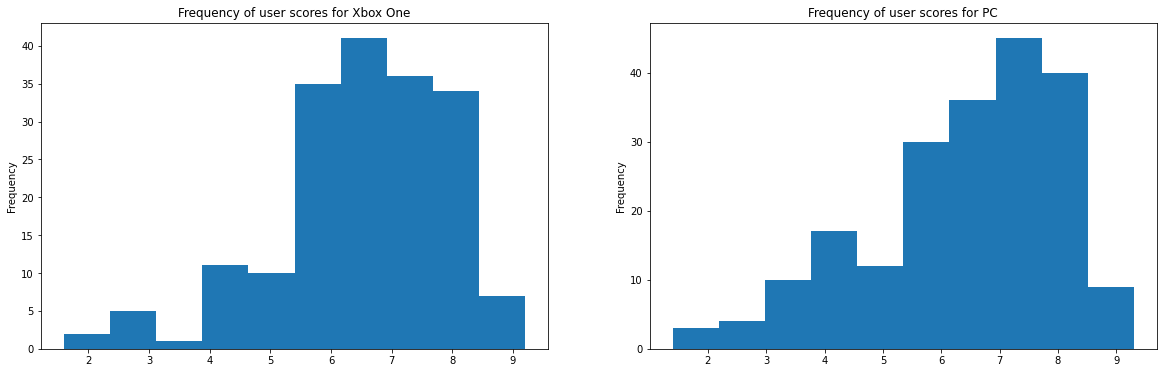

In [48]:
# выберем игры для Xbox One и не будем учитывать игры без оценок
xone_data = games_relevant.query('platform == "XOne" & user_score != 0')
# выберем игры для PC и не будем учитывать игры без оценок
pc_data = games_relevant.query('platform == "PC" & user_score != 0')

print('variance of user_score for Xbox One games =', np.var(xone_data['user_score'], ddof=1))
print('variance of user_score for PC games =', np.var(pc_data['user_score'], ddof=1))
print('--------------------------------------------------------------')
print('mean of user_score for Xbox One games =', xone_data['user_score'].mean())
print('mean of user_score for PC games =', pc_data['user_score'].mean())

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
xone_data['user_score'].plot(kind='hist', bins=10, ax=ax1, title='Frequency of user scores for Xbox One')
pc_data['user_score'].plot(kind='hist', bins=10, ax=ax2, title='Frequency of user scores for PC')
plt.show()

Дисперсии у выборок разные, поэтому для T-теста будем считать что дисперсии не равны (equal_var=False)

In [49]:
# Критический уровень статистической значимости задайте значением 0.05.
alpha = .05

result_hypothesis_1 = st.ttest_ind(xone_data['user_score'], pc_data['user_score'], equal_var=False)
print('p-значение:', result_hypothesis_1.pvalue)
if result_hypothesis_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value позволяет нам не отвергать выдвинутую гипотезу при выбранном критическом уровне статистической значимости. Она может быть верна. С вероятностью 55% наблюдаемое или большее различие между средними двух выборок можно получить случайно при условии, что нулевая гипотеза верна.

Проверим гипотезу: "Средние пользовательские рейтинги жанров Action и Sports разные"

Нулевая гипотеза: "Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sport".  
H0: X_action = X_sports (X - среднее значение)  
Альтернативная гипотеза: "Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sport".  
H1: X_action != X_sports (X - среднее значение)  

variance of user_score for Action games = 1.8890840494348116
variance of user_score for Sports games = 3.022890298704733
--------------------------------------------------------------
mean of user_score for Action games = 6.825047801147237
mean of user_score for Sports games = 5.455897435897437


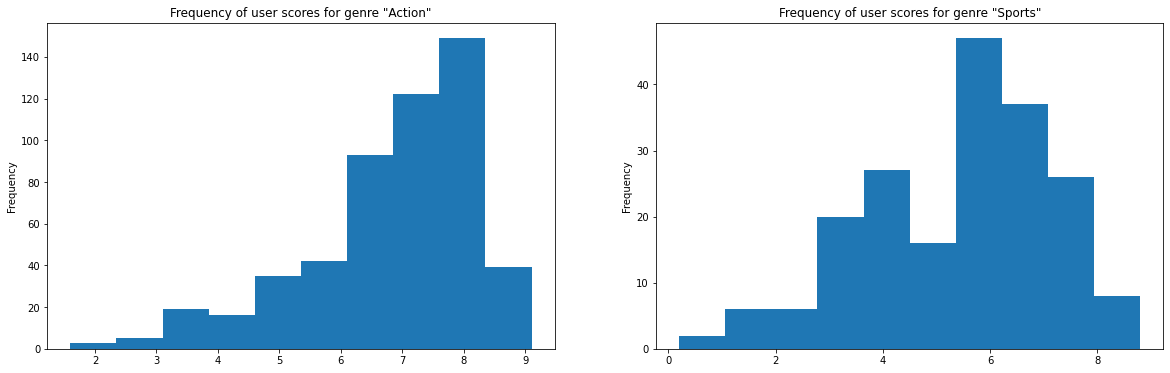

In [50]:
# выберем игры в жанре Action и не будем учитывать игры без оценок
action_data = games_relevant.query('genre == "Action" & user_score != 0')
# выберем игры в жанре Sports и не будем учитывать игры без оценок
sports_data = games_relevant.query('genre == "Sports" & user_score != 0')

print('variance of user_score for Action games =', np.var(action_data['user_score'], ddof=1))
print('variance of user_score for Sports games =', np.var(sports_data['user_score'], ddof=1))
print('--------------------------------------------------------------')
print('mean of user_score for Action games =', action_data['user_score'].mean())
print('mean of user_score for Sports games =', sports_data['user_score'].mean())

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
action_data['user_score'].plot(kind='hist', bins=10, ax=ax1, title='Frequency of user scores for genre "Action"')
sports_data['user_score'].plot(kind='hist', bins=10, ax=ax2, title='Frequency of user scores for genre "Sports"')
plt.show()

Дисперсии у выборок разные, поэтому для T-теста будем считать что дисперсии не равны (equal_var=False)

In [51]:
# Критический уровень статистической значимости задайте значением 0.05.
alpha = .05

result_hypothesis_2 = st.ttest_ind(action_data['user_score'], sports_data['user_score'], equal_var=False)
print('p-значение:', result_hypothesis_2.pvalue)
if result_hypothesis_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Полученное значение говорит нам, что средние двух выборок не равны. Наше предположение по нулевой гипотезе не верно и у нас есть основание дальше не рассматривать эту гипотезу. Получить выборки, при которых средние будут равны можно с вероятностью 4.24307776572644e-20. Таким образом первоначальная гипотеза может быть верной.

### Вывод

На данном шаге были проверены две гипотезы. Первая, то что средние рейтинги пользователей одинаковы для платформ Xbox One и PC. Она была не опровергнута и может быть верной. Так как, при условии что средние равны, для исследуемых данных получить текущее различие между средними этих двух выборок вероятность 55% (при пороговом значении вероятнсти 5%).  
Вторая гипотеза состояло в том, что средние пользовательские рейтинги жанров Action и Sports разные. Если учесть, что нулевая гипотеза формулируется для равенства рейтингов пользователей и она была отвергнута, то первоначальная гипотеза может быть верной.

<a id="step6"></a>
## 6. Общий вывод

В данной работе мы изучали данные о продажах игр, полученные от интернет-магазина "Стримчик". Мы выявляли закономерности, определяющие успешность игры, это позволит в будущем оценить новый продукт на потенциальную популярность и спланировать рекламные компании.<br>
Первоначально данные были изучены и подготовлены к анализу (скорректированы имена столбцов, выявлены и устранены пропуски в данных, приведены к корректным типам данных).<br>
Затем были изучены зависимость продаж конкретной игры от различных параметров (времени, платформы, оценок пользователей и критиков, жанры игры). В ходе анализа были выявлены платформы актуальные на ближайшее будущее (`PS4` и `XOne`), платформы которые были наиболее популярны за последние 5 лет и принесли больше всего продаж (`PS3`, `PS4`, `X360`, `XOne`, `Wii`, `WiiU`). Была изучена зависимость между продажами игры и оценками (критики влияют на прожи несколько в большей степени чем мнения пользователей). Были выявлены самые популярные жанры игр: `Action`, `Shooter`, `Role-Playing`, `Sports`.<br>
Далее был составлен портрет типичного пользователя по регионам, было выявлено что для Северной Америки и Европы предпочтения примерно одинаковые, а в Японии интересы и приоритеты по играм отличаются.<br>
Были проверны гипотезы, что средние пользовательские рейтинги для платформ Xbox One и PC равны (может быть верна), и что средние пользовательские рейтинги для жанров Action и Sports одинаковые (ее тоже нельзя отвергать).